# Logistic Regression model 

Import all required libraries

In [296]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score,
    confusion_matrix,
)

Reading the updated version of data

In [297]:
data = pd.read_csv("../Data/processed_data.csv")

In [298]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,True,False,False,False,False,True,False,False,True,False
1,1,0,0,0,34,1,0,1,0,0,0,1,0,56.95,1889.50,0,True,False,False,False,False,False,True,True,False,False


---------------------------------------------------------
## Data Augmentation then splitting the data

---------------------------------------------------------

In [299]:
x = data.drop(["Churn"], axis=1)
y = data["Churn"]

print("\nBefore SMOTE:")
print(y.value_counts())
print(y.value_counts(normalize=True)*100)
print('-'*40)

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)
print("\nAfter SMOTE:")
print(y.value_counts())


Before SMOTE:
Churn
0    5165
1    1857
Name: count, dtype: int64
Churn
0    73.554543
1    26.445457
Name: proportion, dtype: float64
----------------------------------------

After SMOTE:
Churn
0    5165
1    5165
Name: count, dtype: int64


In [300]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

---------------------------------------------------------
## Fitting the model, hyperparameter Tuning, and cross-validation

---------------------------------------------------------

In [301]:
# # Logistic regression
# logreg = LogisticRegression(random_state=42)

# param_grid = {
#     "C": [0.01, 0.1, 1, 10, 100],
#     "solver": ["liblinear", "saga"],
#     "class_weight": [None, {0: 1, 1: 5}, "balanced"],
#     "max_iter": [100, 200, 500],
# }


# grid_search = GridSearchCV(
#     estimator=logreg,
#     param_grid=param_grid,
#     cv=5,
#     scoring="f1_weighted",
#     verbose=1,
#     n_jobs=-1,
# )
# # 
# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_
# y_prob = best_model.predict_proba(x_test)[:, 1]


# custom_threshold = 0.35
# y_pred_custom = (y_prob >= custom_threshold).astype(int)
# print("Best Parameters:", grid_search.best_params_)

### Commented the tuning and cross-validation cell after getting the best parameters then used it in the model 

In [302]:
best_model = LogisticRegression(random_state=42, C= 10, class_weight='balanced', max_iter= 100, solver= 'liblinear')

best_model.fit(x_train, y_train)
y_prob = best_model.predict_proba(x_test)[:, 1]
custom_threshold = 0.35
y_pred_custom = (y_prob >= custom_threshold).astype(int)

In [303]:
# create data frame of the y_test and y predicted

df = pd.DataFrame({"Y_Actual": y_test, "Y_Predicted": y_pred_custom})
df.head(30)

,Y_Actual,Y_Predicted
8686,1,1
6087,1,1
765,0,1
4868,0,0
562,0,0
6978,1,1
39,1,1
1597,1,1
8174,1,1
7750,1,1


In [304]:
print("\nClassification Report with Custom Threshold:")
print(classification_report(y_test, y_pred_custom))

f1 = f1_score(y_test, y_pred_custom, average="weighted")
print(f"Weighted F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_custom):.2f}")


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1552
           1       0.77      0.93      0.84      1547

    accuracy                           0.83      3099
   macro avg       0.84      0.83      0.83      3099
weighted avg       0.84      0.83      0.83      3099

Weighted F1-Score: 0.83
Accuracy: 0.83


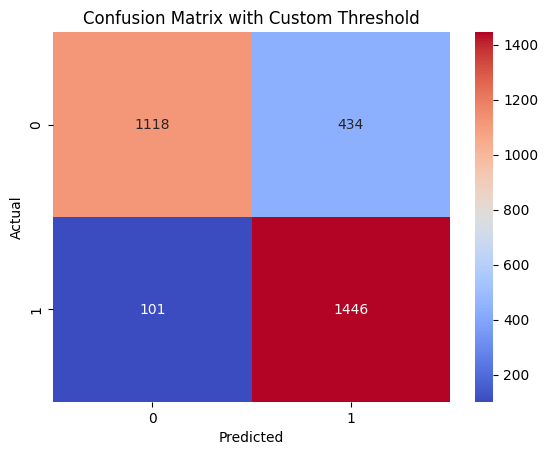

In [305]:
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Custom Threshold")
plt.show()

In [306]:
pd.set_option('display.max_columns', None)
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,True,False,False,False,False,True,False,False,True,False


In [307]:
input_data = pd.DataFrame(
    {
        "gender": ["Male"], # Male or female
        "SeniorCitizen": ["Yes"], # Yes or No
        "Partner": ["No"], # Yes or No
        "Dependents": ["No"], # Yes or No
        "tenure": [1], # 1 to 72
        "Contract": ["Month-to-month"], # Month-to-month, One year, Two year
        "MonthlyCharges": [29.85], # 18.25 to 118.75
        "TotalCharges": [29.85], # 18.8 to 8684.8 Optional
        "PaymentMethod": ["Electronic check"], # Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
        "PaperlessBilling": ["Yes"], # Yes or No
        "MultipleLines": ["No phone service"], # No, Yes, No phone service
        "InternetService": ["DSL"], # DSL, Fiber optic, No
        "OnlineSecurity": ["No"], # No, Yes, No internet service
        "OnlineBackup": ["Yes"], # No, Yes, No internet service
        "DeviceProtection": ["No"], # No, Yes, No internet service
        "TechSupport": ["No"], # No, Yes, No internet service
        "StreamingTV": ["No"], # No, Yes, No internet service
        "StreamingMovies": ["No"], # No, Yes, No internet service
    }
)

input_data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Male,Yes,No,No,1,Month-to-month,29.85,29.85,Electronic check,Yes,No phone service,DSL,No,Yes,No,No,No,No


In [308]:
import joblib  # type: ignore

loaded_label_encoder = joblib.load("../Preprocessing/label_encoder.pkl")


def preprocess_input(User_in):
    # handle OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies
    User_in.loc[:, "OnlineSecurity":] = User_in.loc[:, "OnlineSecurity":].replace(
        {"Yes": 1, "No": 0, "No internet service": 0}
    )
    # handle yes or no to 1 or 0
    User_in[["SeniorCitizen", "Partner", "Dependents", "PaperlessBilling"]] = User_in[
        ["SeniorCitizen", "Partner", "Dependents", "PaperlessBilling"]
    ].replace({"Yes": 1, "No": 0})
    User_in["gender"] = User_in["gender"].apply(lambda x: x.capitalize())
    User_in["gender"] = User_in["gender"].replace({"Male": 1, "Female": 0})

    # handle total charges
    if User_in["TotalCharges"].values[0] == None:
        if User_in["tenure"].values[0] != 0:
            User_in["TotalCharges"] = User_in["MonthlyCharges"] * User_in["tenure"]
        else:
            User_in["TotalCharges"] = User_in["MonthlyCharges"]
    # handle InternetService, PaymentMethod, MultipleLines using one hot encoding
    User_in = pd.get_dummies(
        User_in,
        columns=["InternetService", "PaymentMethod", "MultipleLines"],
        drop_first=True,
    )

    User_in["Contract"] = loaded_label_encoder.transform(User_in["Contract"])

    return User_in

In [309]:
input_data[['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
            'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
            'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
            'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes']] = False

In [310]:
input_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'Contract', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod',
       'PaperlessBilling', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes'],
      dtype='object')

In [311]:
pd.set_option('future.no_silent_downcasting', True)
prediction_input = preprocess_input(input_data)

In [312]:
prediction_input = prediction_input[
    [
        "gender",
        "SeniorCitizen",
        "Partner",
        "Dependents",
        "tenure",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "MonthlyCharges",
        "TotalCharges",
        "InternetService_DSL",
        "InternetService_Fiber optic",
        "InternetService_No",
        "PaymentMethod_Bank transfer (automatic)",
        "PaymentMethod_Credit card (automatic)",
        "PaymentMethod_Electronic check",
        "PaymentMethod_Mailed check",
        "MultipleLines_No",
        "MultipleLines_No phone service",
        "MultipleLines_Yes",
    ]
]

In [313]:
prediction_input.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,1,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,False,False,False,False,False,False,False,False,False,False


In [314]:
x_test.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
8686,1,1,0,0,15,0,0,0,0,0,0,0,0,76.334218,1148.374228,False,True,False,False,False,True,False,True,False,True


In [315]:
User_prob = best_model.predict_proba(prediction_input)[:, 1]
custom_threshold = 0.35
prediction = (User_prob >= custom_threshold).astype(int)

if prediction[0] == 1:
    print("The user is likely to churn")
else:
    print("The user is not likely to churn")

The user is not likely to churn
